In [1]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

/home/tiennv/.conda/envs/hf_inpaint/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# pipeline = AutoPipelineForInpainting.from_pretrained(
#     "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
# )
pipeline = AutoPipelineForInpainting.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.21it/s]


In [3]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

embedding 1: torch.Size([1, 77, 768])
embedding 2: torch.Size([1, 77, 1280])


100%|██████████| 49/49 [00:14<00:00,  3.28it/s]


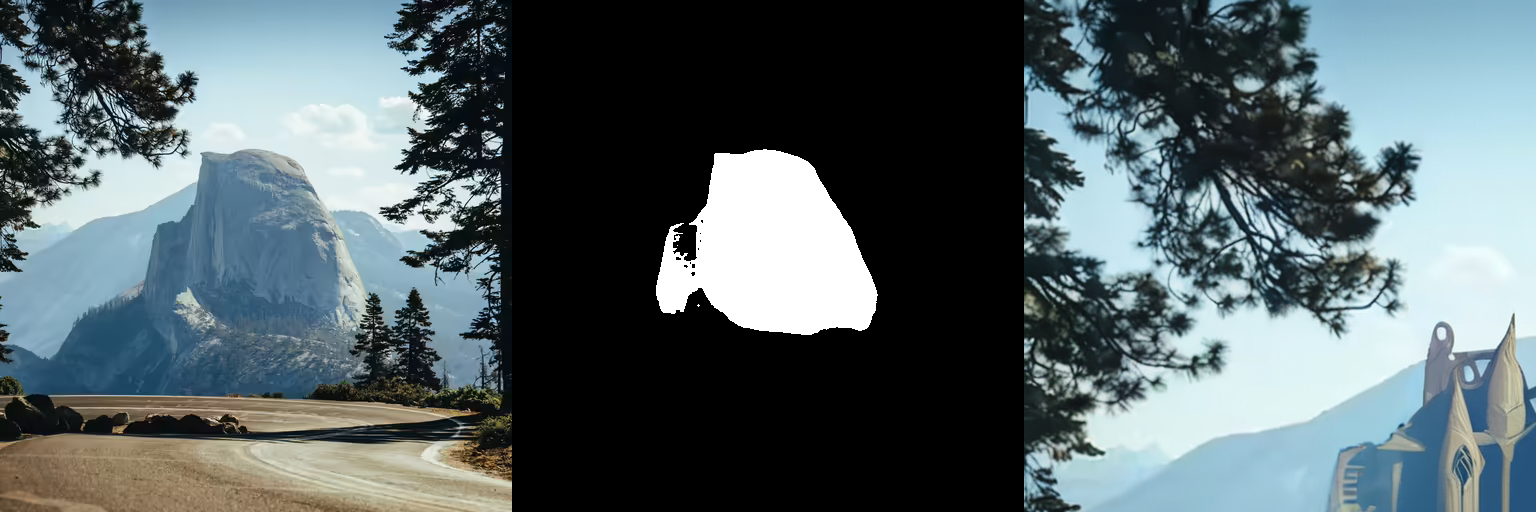

In [4]:
generator = torch.Generator("cuda").manual_seed(92)
prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

In [5]:
# image